Linear Regression Model can be train in two different forms.

- Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set.

- Using an iterative optimization approach, Gradient Descent, that gradually tweaks the model parameters to minimize the cost function over the training set.


Polynomial Regression is a more complex model that can fit non-linear dataset. It is more prone to overfitting the training data.

## The Normal Equation

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

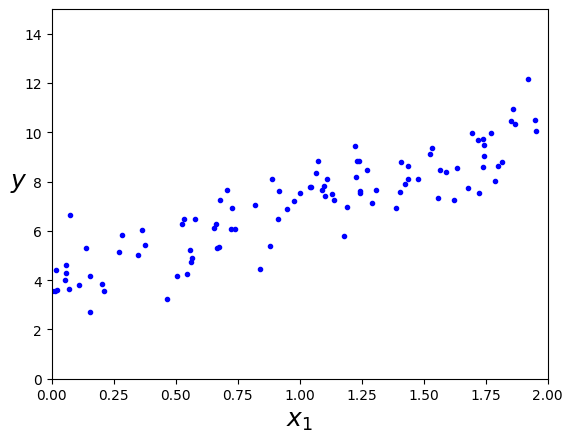

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Concatenating the ones matrix with features to operate matrix multiplication i.e. for simplicity. It's like multiplying the constant term or y-intercept with 1. 

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best has two rows as we are dealing with single independent variable. The rows in theta_best = Independent Variable + 1.

First row has the value of constant term or y-intercept or bias term and the second row has the value of slope or weight which is multiplied to feature.

In [5]:
print(theta_best)

[[3.94156932]
 [3.09397746]]


Now, the X_new is the features which we need to predict. We again need to concatenate to match with training sets. We are having a matrix multiplication of X_new_b with theta_best getting the values of y.

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.94156932]
 [10.12952423]]


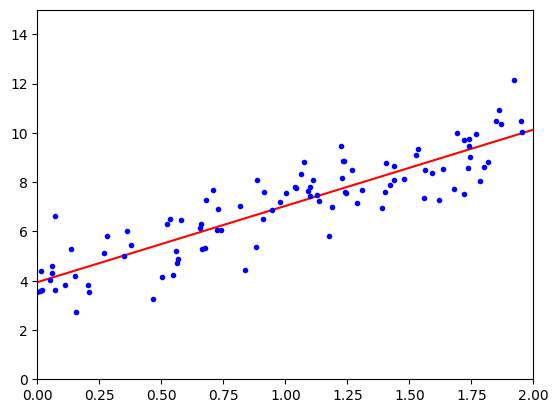

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Equivalent code using Scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94156932]), array([[3.09397746]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.94156932],
       [10.12952423]])

## Gradient Descent
It tweaks parameters iteratively in order to minimize a cost function by measuring the local gradient of the error function with regards to the parameter vector theta, and it goes in the direction of descending gradient, until the gradient is zero.

If the learning rate is too small, then the algorithm will take a long time as it will go through many iterations to converge.

If the learning rate is too high, it might jump across the valley and end up on the other side, possibily even higher up.

When using Gradient Descent, we should ensure that all features have a similar scale (by using StandardScaler class), or else it will take much longer to converge.

## Batch Gradient Descent
It uses the whole training set to compute the gradients at every step. It is much faster using Gradient Descent than using the Normal Equation while there are huge number of features.

In [10]:
eta = 0.1 # learning-rate
n_iterations = 1000
m = 100 # number of training data. It helps to make update step size independent of dataset size.

theta= np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [11]:
print(theta)

[[3.94156932]
 [3.09397746]]


To find a good learning rate, we can use Grid Search.


## Stochastic Gradient Descent
It just picks a random instance in the training set at every step and computes the gradients based only on that single instance making it much more faster than BGD. But, it is less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, thus the final parameter values are good but not optimal.

Also, this irregularity helps the algorithm to jump out of local minima and find out global minima than Batch Gradient Descent.

We can gradually reduce learning rate to jump out of local minima and to find out the optimal solution. This process is called Simulated Annealing.

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [13]:
print(theta)

[[3.91733424]
 [3.14986558]]


Implementing in Sk-learn

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [15]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.99091166] [3.14234367]


## Mini-Batch Gradient Descent
It computes the gradients on small random sets of instances called mini-batches. 

## Polynomial Regression
It add powers of each feature as new features, then train a linear model on this extended set of features.

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.rand(m, 1)

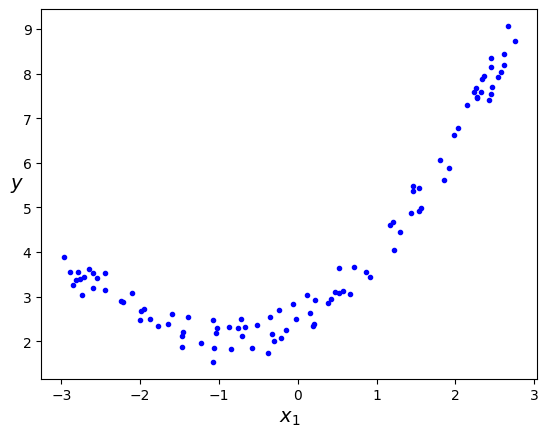

In [17]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', rotation=0, fontsize=14)
plt.show()

We need to tranform our training data by adding the square of each feature in the trainig set as new features to fit a linear Regression model.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.45824792])

In [19]:
X_poly[0]

array([2.45824792, 6.04298282])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.56333105] [[0.98446457 0.48800039]]


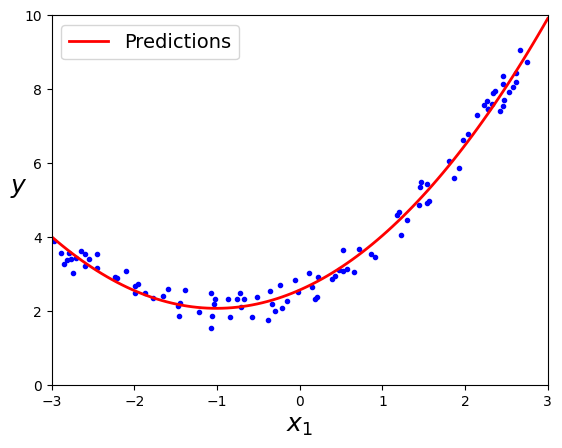

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curves

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, 80, 0, 2.5])
    plt.show()

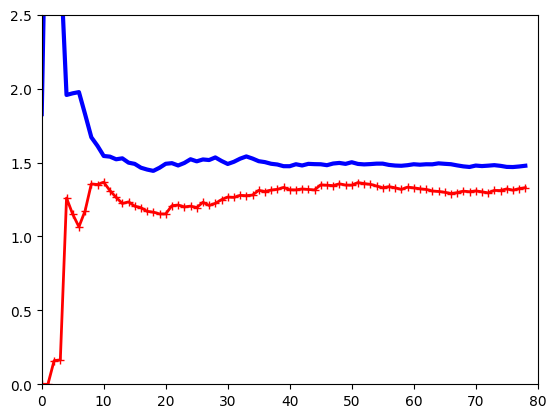

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

These learning curves are typical of an underfitting model. Adding more training examples will not help, either we need to use a more complex model or come up with better features.

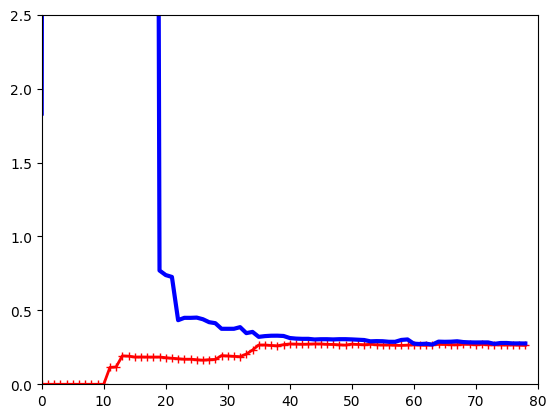

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("sgd_reg", LinearRegression())))
plot_learning_curves(polynomial_regression, X, y)

The gap between the curves means that the model performs significantly better on the training data than on the validation data, which is the hall-marks of an overfitting model.

### The Bias/Variance Tradeoff
#### Bias
It is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. It is most likely to underfit the training data.

#### Variance
It is due to the models excessive sensitivity to small variations in the training data. 

#### Irreducible error
It is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data.

Increasing model's complexity will typically increase its variance and reduce its bias and vice versa.

## Regularized Linear Models
It helps to reduce overfitting of the model.

### Ridge Regression
It forces the learning algorithm to keep the model weights as small as possible. We evaluate the model's performance using the unregularized performance measure. If alpha=0 then Ridge Regression is just Linear Regression. If alpha is very large, then all weights end up very close to zero and the result is a flat line going through data's mean. It is important to scale the data before performing Ridge Regression.

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.50168946]])

In [26]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.47776269])

Specifying 'l2' indicates that we want SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector: simply Ridge Regression. y.ravel() means to flatten the y array.

### Lasso Regression
Least Absolute Shirnkage and Selection Operator Regression uses the l1 norm of the weight vector instead of half the square of the l2 norm. It encourage sparsity in a model, meaning that some coefficients become exactly zero, effectively ignoring certain features.


1. L1 Norm(Manhattan Norm or Taxicab Norm):
The L1 norm of a vector is the sum of the absolute values of its individual components.

2. L2 Norm(Euclidean Norm):
The L2 norm of a vector is the square root of the sum of the squares of its individual components.

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.4584529])

In [28]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.4789168])

### Elastic Net
Elastic Net is a middle ground between Ridge and Lasso Regression. When r=0, Elastic Net is equivalent to Ridge Regression, and when r=1, it is equivalent to Lasso Regression.

Ridge Regression is a good default, but if only few features are actually useful, we should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [29]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.46073213])

## Early Stopping
Gradient Descent can be regularized by stopping training as soon as the validation error reaches minimum. 

With Stochastic and Mini-batch Gradient Descent, the curves are not smooth, and it may be hard to know whether it have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time, then roll back the model parameters to the point where the validation error was at the minimum. :)

In [30]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5*X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float('inf')
best_epoch=None
best_model=None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of

D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of

D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of

D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
D:\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of

In [31]:
print(best_epoch, best_model, val_error)

243 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             warm_start=True) 2.68051555138823


## Logistic Regression
It acts like a binary classifier. It is used to estimate the probabiltiy that an instance belongs to a particular class.

It is sigmoid function which estimates the probability.

### Training and Cost Function

When the probability is low the function grows large, so the cost will be large if the model estimates a low probability for positive instance and estimates a high probabiltiy for negative instance.

When the probability is high the function gets close to zero, so the cost will be low if the model estimates a high probabiltiy for positive instance and low probabiltiy for negative instance.

It is called the log loss function or binary cross-entropy.

The cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum if learning rate is not high.

### Decision Boundaries

In [32]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [33]:
X = iris["data"][:, 3:]
y = (iris["target"]==2).astype(np.int32)

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

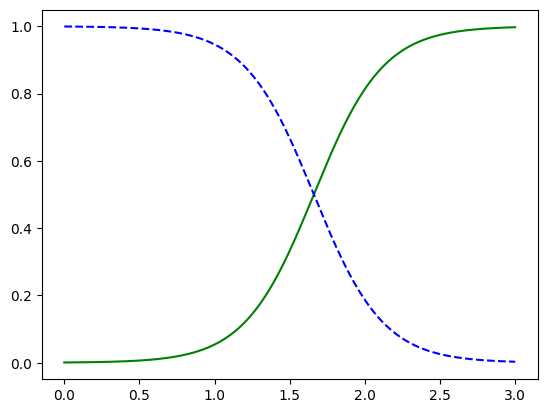

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris-Virginica")

### Softmax Regression
The logistic Regression model can be generalized to support mulitple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logisitic Regression.

The Softmax Regression classifier predicts only one class at a time which has the maximum score (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. We cannot use it to recognize multiple people in one picture.

It uses l2 regularization by default, which can be controlled using the hyperparameter C.

In [36]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [37]:
softmax_reg.predict([[5, 3]])

array([2])

In [38]:
softmax_reg.predict_proba([[5, 3]])

array([[8.83643458e-10, 8.64916081e-05, 9.99913508e-01]])

## Exercises

1. What Linear Regression training algorithm can you use if you have a training set with millions of features?

--> Batch Gradient Descent if the training sets fit in the memory else, SGD or MGD.

---


2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

--> Algorithms like Gradient Descent and Regularizations will suffer. We can use StandardScale Class to standarize the data in the same scale.

---


3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

--> No, it can't get stuck in a local minima as the cost function in Logistic Regression is convex.

---


4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

--> If the learning rate is not too high, then all Gradient Descent algorithms will lead to fairly same model but not the same until we are gradually reducing learning rate in Stochastic Gradient Descent and Mini-batch Gradient Descent.

---


5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

--> If the validation error and training error is going up at every epoch, then the learning rate is too high, so the model is diverging. But if only the validation error is going up then the model is overfitting the data. 

---


6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

--> No, it is not a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up as both Mini-batch and Stochastic Gradient Descent never goes to optimal solution directly but they bounce up and down. Stopping immediatley can result to stop early before the optimum is reached. The best is to save the model at every epochs and when the model is not improving good just reverting to the best.

---


7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

--> Stochastic Gradient Descent will reach the vicinity of the optimal solution the fastest. Batch Gradient Descent will actually converge while Stochastic and Mini-batch Gradient Descent will bounce up and down. We can make them converging by reducing the learning rate gradually.

---


8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

--> If there is large gap between the training error and the validation error, then the model is overfitting the data. We can reduce the degree of the Polynomial Regression, can regularize the model using l1 or l2 norm, or can increase the training set.

---


9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

--> If both training and validation errors are high then the model is underfitting the training set, which means it has high bias. We should try reducing the regularization hyperparameter alpha.

---


10. Why would you want to use:
    • Ridge Regression instead of Linear Regression?
    
    --> Ridge Regression is used to penalize the model and reduce its complexity or degree which helps the model to perform even better than plain Linear Regression.

    • Lasso instead of Ridge Regression?
    
    --> Lasso Regression uses l1 norm, which tends to remove unncessary features. It is used when we suspect that only some features are useful, whereas Ridge Regression is used when we are not sure.

    • Elastic Net instead of Lasso?
    
    --> Lasso tends to behave erratically in cases when there are more features than training instances or when the features are high correlated. Elastic-Net is the mixture of both ridge and lasso regression, so in the case, when we want to avoid the erratic behaviour, we can use Elastic-Net having alpha close to 1.
    
---


12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

In [72]:
X = iris['data']
y = iris['target']

In [73]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [74]:
np.random.seed(2042)

In [75]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-validation_size]]
y_valid = y[rnd_indices[train_size:-validation_size]]
X_test = X_with_bias[rnd_indices[:-test_size]]
y_test = y[rnd_indices[:-test_size]]

In [76]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [77]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [78]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [79]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps/exp_sums

In [80]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [81]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 9.029071210612898
500 0.4359789640931864
1000 0.34451112175886095
1500 0.28986495304835536
2000 0.25219567427680234
2500 0.22455901569649694
3000 0.2034105920900475
3500 0.18669799481212637
4000 0.17314749374763255
4500 0.16192815738762414
5000 0.15247587350929


In [82]:
Theta

array([[ 0.32438102,  0.07651881, -0.72986262],
       [ 0.34656197,  0.21821407, -1.51448539],
       [ 2.06281437,  0.08445574, -1.46615244],
       [-2.13210332,  0.72679753,  3.19723244],
       [ 0.91423321, -0.54983323,  1.83964083]])

In [83]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [84]:

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 10.752667742147036
500 0.6953739363625655
1000 0.6595604352710838
1500 0.6294795085864162
2000 0.6044237846282823
2500 0.583702651318417
3000 0.5666588978179958
3500 0.5526914565262854
4000 0.5412696761682806
4500 0.5319378316939607
5000 0.5243125028638794


In [85]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.8

In [86]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.98615812309473
13 1.0965365000396443
14 1.1142136662807607 early stopping!


In [87]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.6333333333333333